# Notebook to plot inference results.

In [3]:
from src.utils import load_inference_results
from src.parameters import compute_real_theta_from_config, THETA_HAT_FUNC_DICT
from src.plotting import (
    plot_posterior_distributions,
    plot_posterior_boxplots,
    # plot_matrix_element_boxplot,
    # plot_vector_parameter_boxplot,
)
import matplotlib.pyplot as plt
import numpy as np
# auto reload
%load_ext autoreload
%autoreload 2

In [3]:
NICE_LABEL_MAP = {
    'resampling_empirical': "PR empirical",
    'resampling_empirical_normal': "PR Normal",
    'resampling_empirical_t': "PR Student-T",
    'bayesian_correct_likelihood_uninformative': "Uninform. prior",
    'bayesian_incorrect_likelihood': "Incorrect likelihood",
    'True θ': "True $\\theta$",
    'Observed θ': "Observed $\hat{\\theta}_{n_{obs}}$", 
    
}

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_52817/3164009702.py:8: SyntaxWarning: invalid escape sequence '\h'
  'Observed θ': "Observed $\hat{\\theta}_{n_{obs}}$",


Original labels: ['resampling_empirical', 'resampling_empirical_normal', 'resampling_empirical_t', 'bayesian_correct_likelihood_uninformative', 'bayesian_incorrect_likelihood', 'True θ', 'Observed θ']


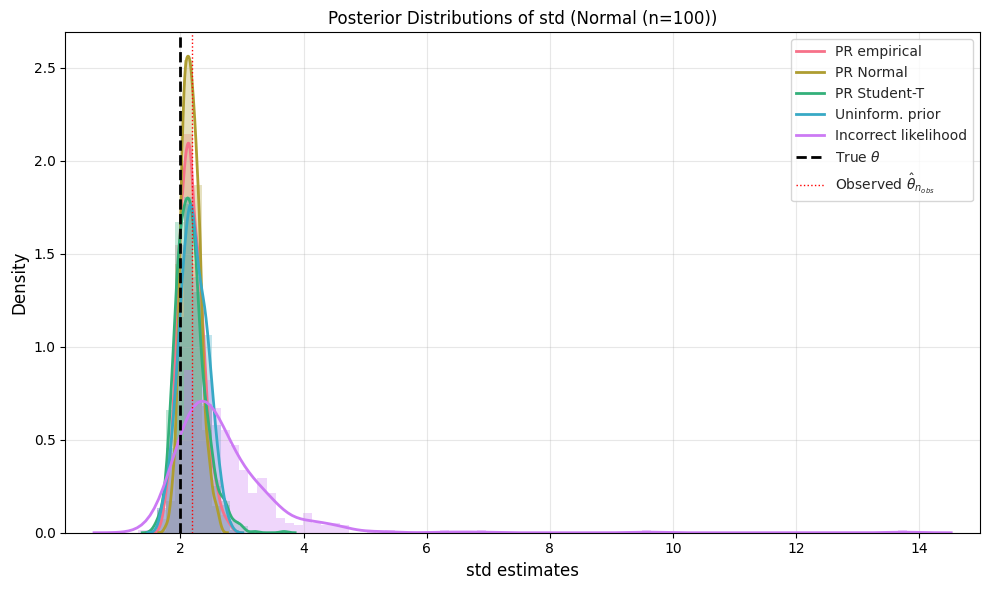

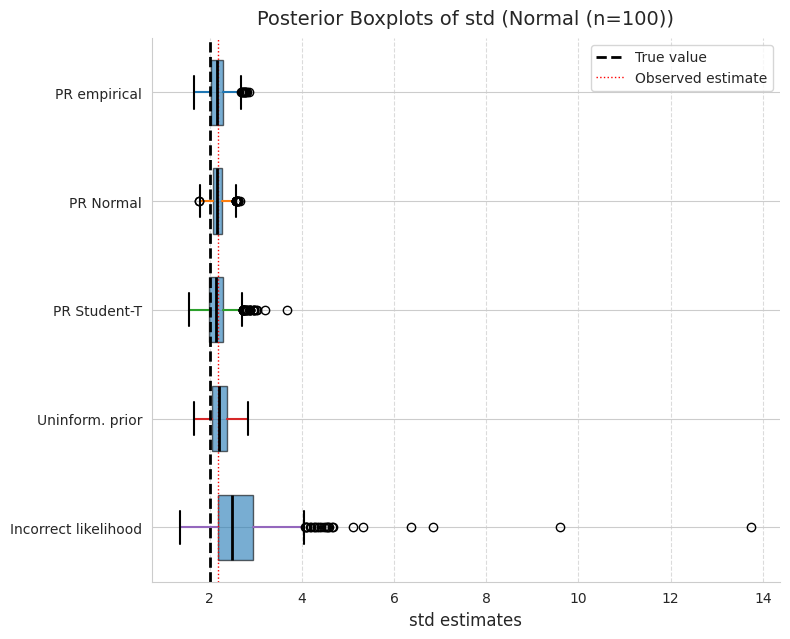

In [25]:

experiment_name = "Normal (n=100)"
theta_name = "std"
remove_methods = [
    # "bayesian_incorrect_likelihood"
]
#########
experiment_results, experiment_config, X_obs = load_inference_results(experiment_name)
theta_samples = experiment_results[theta_name]
for method in remove_methods:
    if method in theta_samples:
        del theta_samples[method]
true_theta = compute_real_theta_from_config(experiment_config)[theta_name]
theta_hat_obs = THETA_HAT_FUNC_DICT[theta_name](X_obs)

plot_posterior_distributions(
    theta_samples=experiment_results[theta_name],
    true_theta=true_theta,
    theta_hat_obs=theta_hat_obs,
    plot_type='both',
    bins=100,
    figsize=(10, 6),
    title=f"Posterior Distributions of $\\theta=${theta_name} ({experiment_name})",
    xlabel=f'{theta_name} estimates',
    ylabel='Density',
    show_legend=True,
    alpha=0.3,
    # x_range=(-1.5, 1.5),
)
# changing legend names
handles, labels = plt.gca().get_legend_handles_labels()
print("Original labels:", labels)
handles = [h for h, l in zip(handles, labels) if l not in remove_methods]
labels = [NICE_LABEL_MAP.get(l, l) for l in labels]
plt.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.title(f"Posterior Distributions of {theta_name} ({experiment_name})")
plt.xlabel(f'{theta_name} estimates')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()

plt.show()

fig, ax = plot_posterior_boxplots(
    theta_samples=experiment_results[theta_name],
    true_theta=true_theta,
    theta_hat_obs=theta_hat_obs,
    title=f"Posterior Boxplots of {theta_name} ({experiment_name})",
    xlabel=f'{theta_name} estimates',
)
# change yticks label by getting the current y-tick labels
# get yticklabels
yticklabels = ax.get_yticklabels()
ax.set_yticklabels(
    [NICE_LABEL_MAP.get(tick.get_text(), tick.get_text()) for tick in yticklabels],
    fontsize=10
)
# change legend names
handles, labels = plt.gca().get_legend_handles_labels()
handles = [h for h, l in zip(handles, labels) if l not in remove_methods]
labels = [NICE_LABEL_MAP.get(l, l) for l in labels]
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [38]:

from src.plotting import plot_posterior_boxplots_matrix
experiment_name = "VAR1 (n=100)"
theta_name = "VAR1_A_hat"
remove_methods = [
    # "bayesian_incorrect_likelihood"
    "bayesian_bvar_analytical",
    "bayesian_bvar_uninformative",
]
#########
experiment_results, experiment_config, X_obs = load_inference_results(experiment_name)
theta_samples = experiment_results[theta_name]
for method in remove_methods:
    if method in theta_samples:
        del theta_samples[method]
true_theta = np.array(experiment_config['A'])
theta_hat_obs = THETA_HAT_FUNC_DICT[theta_name](X_obs)

theta_samples = {
    method: np.array(samples) for method, samples in theta_samples.items() if method not in remove_methods
}
theta_samples["resampling_var1_2d"][:, 0, 0]

array([0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568609,
       0.70568609, 0.70568609, 0.70568609, 0.70568609, 0.70568

In [35]:
experiment_results.keys()

dict_keys(['VAR1_A_hat', 'VAR1_sigma_eps_hat', 'posterior_mean', 'posterior_precision', 'posterior_scale', 'posterior_df', 'VAR1_X0_hat', 'coefficients'])

In [89]:
from src.chooseN_pipeline import choose_N_1D

experiment_name = "Student-T (df=5, n=100)"
experiment_results, experiment_config, X_obs = load_inference_results(experiment_name)

N_step = 500
N_min = 500
N_max = 50000
avg_errors_dict = choose_N_1D(
    experiment_config=experiment_config,
    N_max=N_max,
    N_min=N_min,
    N_step=N_step,
    iterations=50,
)

Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [rand_var]
Sampling: [ra

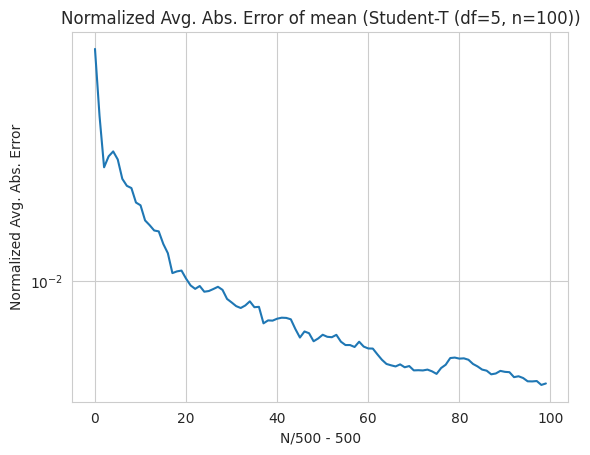

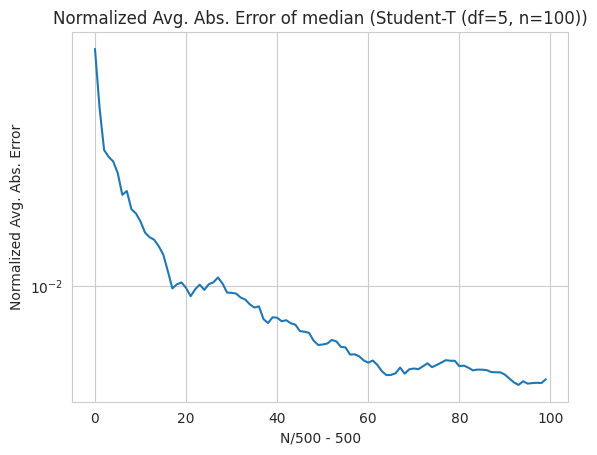

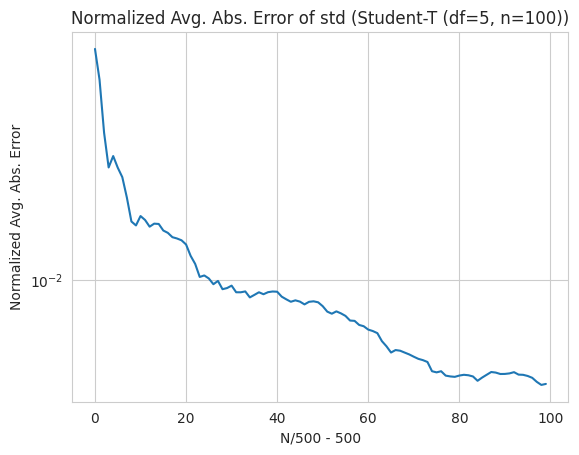

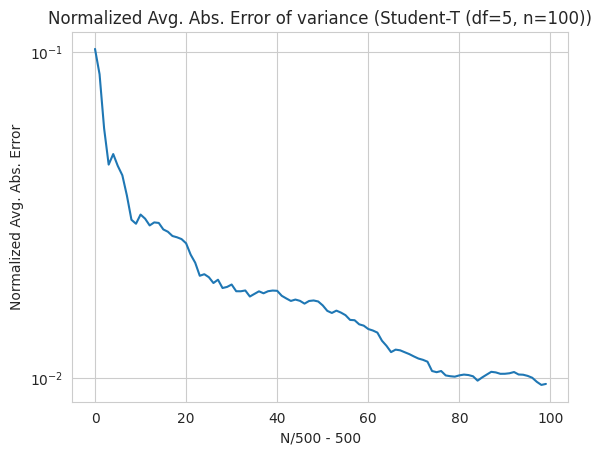

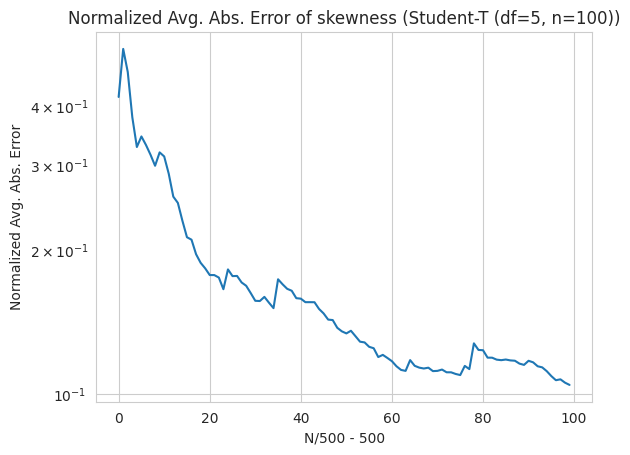

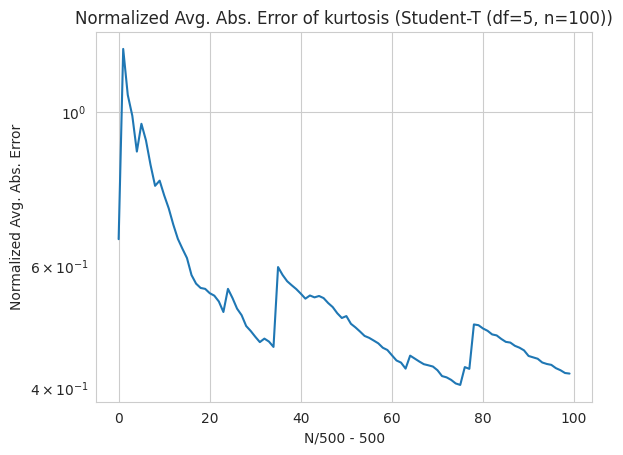

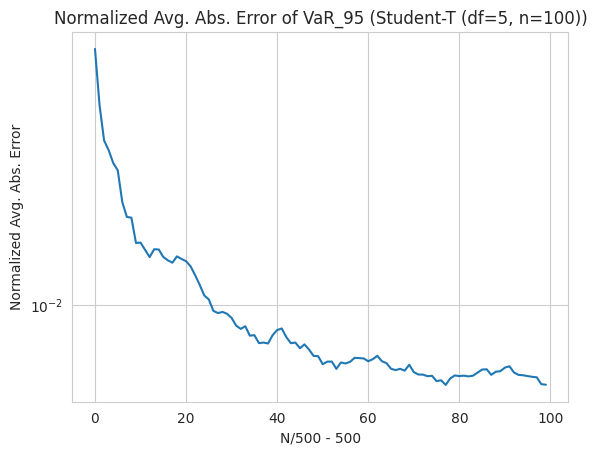

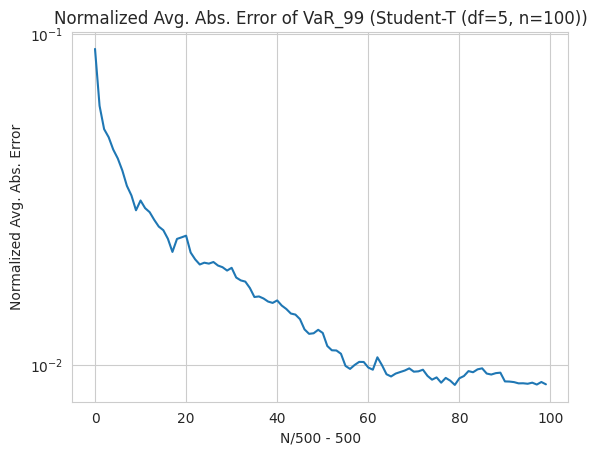

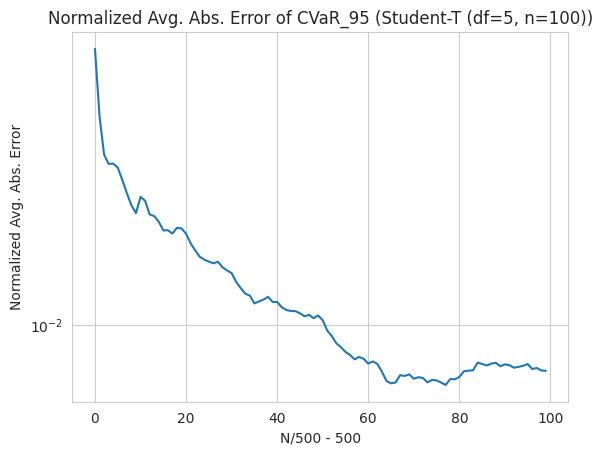

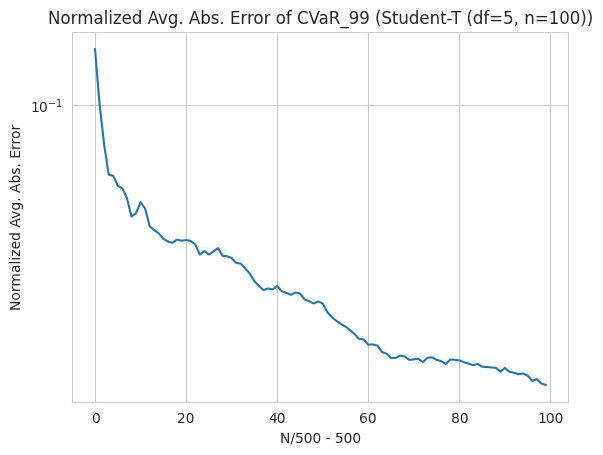

In [90]:
# PLot for all keys
for key, avg_errors in avg_errors_dict.items():
    plt.plot(avg_errors, label=key)
    plt.xlabel(f'N/{N_step} - {N_min}')
    plt.ylabel('Normalized Avg. Abs. Error')
    #ylog scale
    plt.yscale('log')
    plt.title(f'Normalized Avg. Abs. Error of {key} ({experiment_name})')
    plt.show()

In [4]:
from src.chooseN_pipeline import choose_N

experiment_name = "VAR1 (n=100)"
experiment_results, experiment_config, X_obs = load_inference_results(experiment_name)

N_step = 100
N_min = 100
N_max = 10000
avg_errors_dict = choose_N(
    experiment_config=experiment_config,
    VAR1=True,
    N_max=N_max,
    N_min=N_min,
    N_step=N_step,
    iterations=10,
)

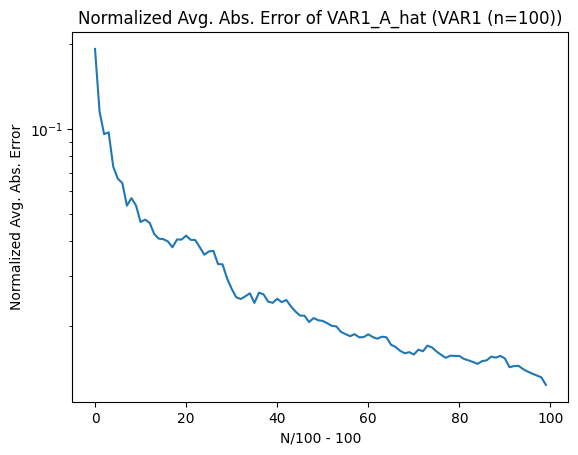

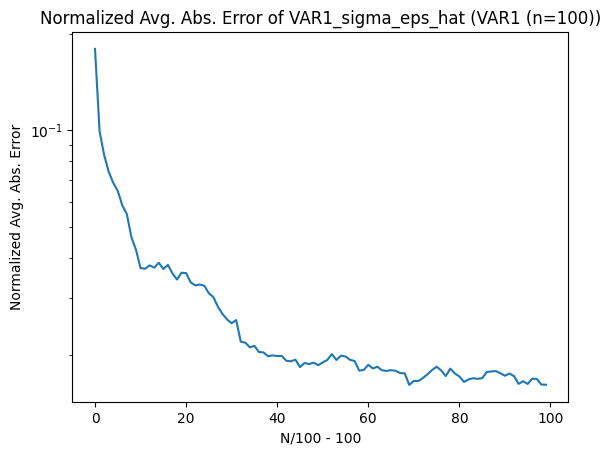

In [5]:
# PLot for all keys
for key, avg_errors in avg_errors_dict.items():
    plt.plot(avg_errors, label=key)
    plt.xlabel(f'N/{N_step} - {N_min}')
    plt.ylabel('Normalized Avg. Abs. Error')
    #ylog scale
    plt.yscale('log')
    plt.title(f'Normalized Avg. Abs. Error of {key} ({experiment_name})')
    plt.show()